In [1]:
import tweepy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


consumer_key = "9K5PrCQxxwI0OGMKE9G0Stb4j"
consumer_key_secret = "tQUTp5SKJCWuR7FgGKzjk0YovD54R6k4MrvYQGv8xcuFMQQD4Z"
access_token = "1310440475371814912-XtMcLHTHWoILvL8VLpx2pZtkvefeyS"
access_token_secret = "KedbLZ5pmxrLKxwN2stjnJsT5MsiXtlHXrclcbfLpl9He"
b_token = "AAAAAAAAAAAAAAAAAAAAALvJbgEAAAAA5owyA7OauLtVgo6HhdKQc8%2BQyZk%3DebnzCgAUDh0eTCNQS1XX4ImulAfhdhob89xHMTujziBLdX8yiB"

client = tweepy.Client(bearer_token=b_token, 
                       consumer_key=consumer_key, 
                       consumer_secret=consumer_key_secret, 
                       access_token=access_token, 
                       access_token_secret=access_token_secret)

In [2]:
from datetime import datetime

def parse_data(tweets_generator, limit=1000):
    ids = []
    created_ats = []
    retweet_counts = []
    reply_counts = []
    like_counts = []
    tags = []
    texts = []
    
    for tweet in tweets_generator.flatten(limit=limit):
        tweet = tweet.data
        ids.append(tweet['id'])
        created_ats.append(datetime.strftime(datetime.strptime(tweet['created_at'],"%Y-%m-%dT%H:%M:%S.%fZ"), '%Y-%m-%d %H:%M:%S'))
        retweet_counts.append(tweet['public_metrics']['retweet_count'])
        reply_counts.append(tweet['public_metrics']['reply_count'])
        like_counts.append(tweet['public_metrics']['like_count'])
        texts.append(tweet['text'])
        
        try:
            hashtags = " ".join(list(map(lambda x : x['tag'], tweet['entities']['hashtags'])))
            
        except:
            hashtags = None

        tags.append(hashtags)
        
    df = pd.DataFrame({'id' : ids, 'created' : created_ats, 'retweets' : retweet_counts, 'replies' : reply_counts, 'likes' : like_counts})
    df['created'] = pd.to_datetime(df['created'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    # df['count'] = 1

    return df


def timeline_vis(data, unit='day', column='count', crawl_query='moonbirds'):
    ''' 
    unit: 'day', 'hour'
    column: 'count', 'reply', 'retweet', 'like'
    '''
    times = pd.to_datetime(data.created_at)
    
    groups = [times.dt.day] if unit == 'day' else [times.dt.day, times.dt.hour]
    grouped = data.groupby(groups).sum()

    if unit == 'day':
        xticks = list(map(lambda x : '04-{}'.format(x), grouped.index.values))
    else:
        xticks = list(map(lambda x : '{}-{}'.format(x[0], x[1]), grouped.index.values))
    aggregated = grouped[column].values

    figsize = (80, 10) if unit == 'hour' else(20, 10)
    plt.figure(figsize=figsize)
    plt.plot(np.arange(len(aggregated)), aggregated)
    plt.scatter(np.arange(len(aggregated)), aggregated)
    plt.xticks(np.arange(len(aggregated)), xticks, fontsize=14)
    plt.legend(['# of tweets including #{} #nft'.format(crawl_query)], fontsize=25)
    plt.savefig('{}_{}.png'.format(column, unit))
    plt.show()


def word_viz(data, query='text'):
    tokens = {}
    for i in range(len(data)):
        if data.iloc[i][query]:
            text = data.iloc[i][query].split()
            
            for token in text:
                if tokens.get(token):
                    tokens[token] += 1
                else:
                    tokens[token] = 1
                
    wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(tokens)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.savefig('{}.png'.format(query))
    plt.show()
    
    return tokens


In [5]:
query = '#moonbirds "nft" -is:retweet'

tweets_generator = tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['text', 'public_metrics', 'context_annotations', 'created_at', 'entities'], max_results=100)

data = parse_data(tweets_generator, limit=10000)
data = data.sort_values('created', ascending=False)
data['hashtag'] = query.split()[0].replace('#', '')
data.set_index('id').to_csv('crawled_{}.csv'.format(query.split()[0].replace('#', '')), encoding='utf-8')
data.head()

,id,created,retweets,replies,likes,hashtag
0,1531490284374085634,2022-05-31 04:18:32,0,0,0,moonbirds
1,1531482515902500865,2022-05-31 03:47:40,0,0,1,moonbirds
2,1531467735749644289,2022-05-31 02:48:56,1,0,6,moonbirds
3,1531465515415359491,2022-05-31 02:40:06,0,1,4,moonbirds
4,1531455528257392641,2022-05-31 02:00:25,1,1,1,moonbirds


In [4]:
query = '#bayc "nft" -is:retweet'

tweets_generator = tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['text', 'public_metrics', 'context_annotations', 'created_at', 'entities'], max_results=100)

data = parse_data(tweets_generator, limit=10000)
data = data.sort_values('created', ascending=False)
data['hashtag'] = query.split()[0].replace('#', '')
data.set_index('id').to_csv('crawled_{}.csv'.format(query.split()[0].replace('#', '')), encoding='utf-8')
data.head()

,id,created,retweets,replies,likes,hashtag
0,1531493533533646848,2022-05-31 04:31:26,0,0,4,bayc
1,1531493369494618112,2022-05-31 04:30:47,0,0,2,bayc
2,1531493143874572291,2022-05-31 04:29:53,0,0,1,bayc
3,1531493066720219136,2022-05-31 04:29:35,0,0,5,bayc
4,1531493040329609216,2022-05-31 04:29:29,0,0,2,bayc


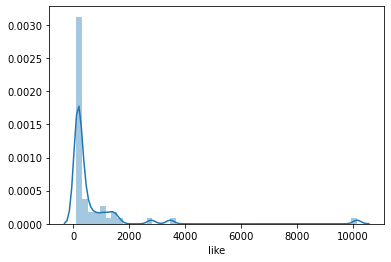

In [8]:
sns.distplot(data.loc[data['like'] > 100]['like'])

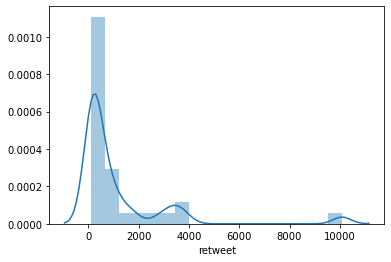

In [9]:
sns.distplot(data.loc[data['retweet'] > 100]['retweet'])

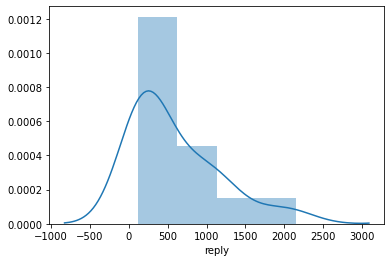

In [10]:
sns.distplot(data.loc[data['reply'] > 100]['reply'])

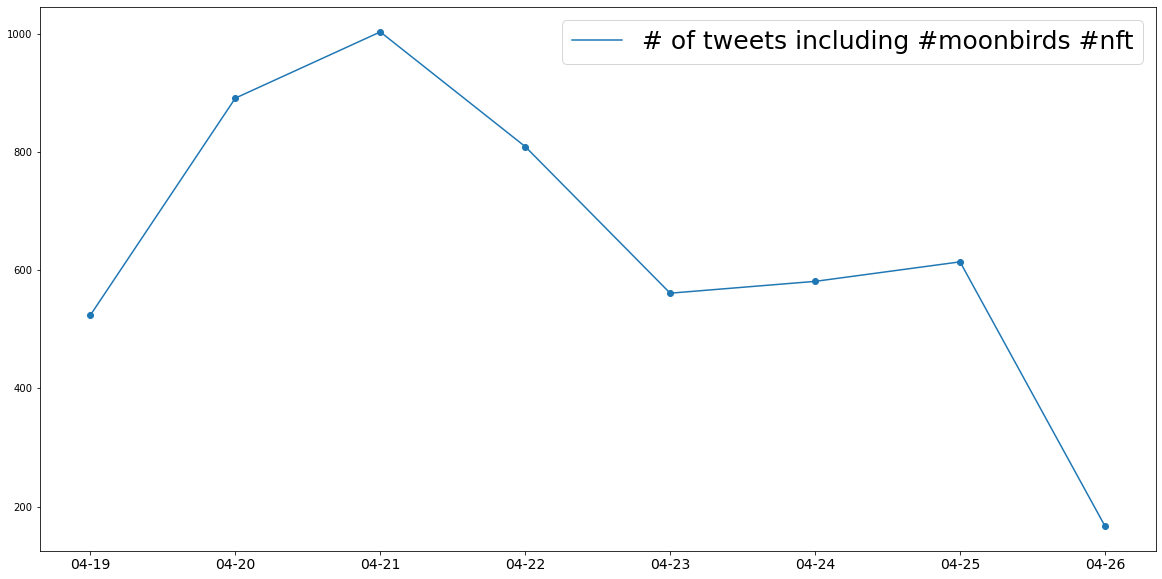

In [16]:
column = 'count'
unit = 'day'
timeline_vis(data, unit=unit, column=column, crawl_query='moonbirds')

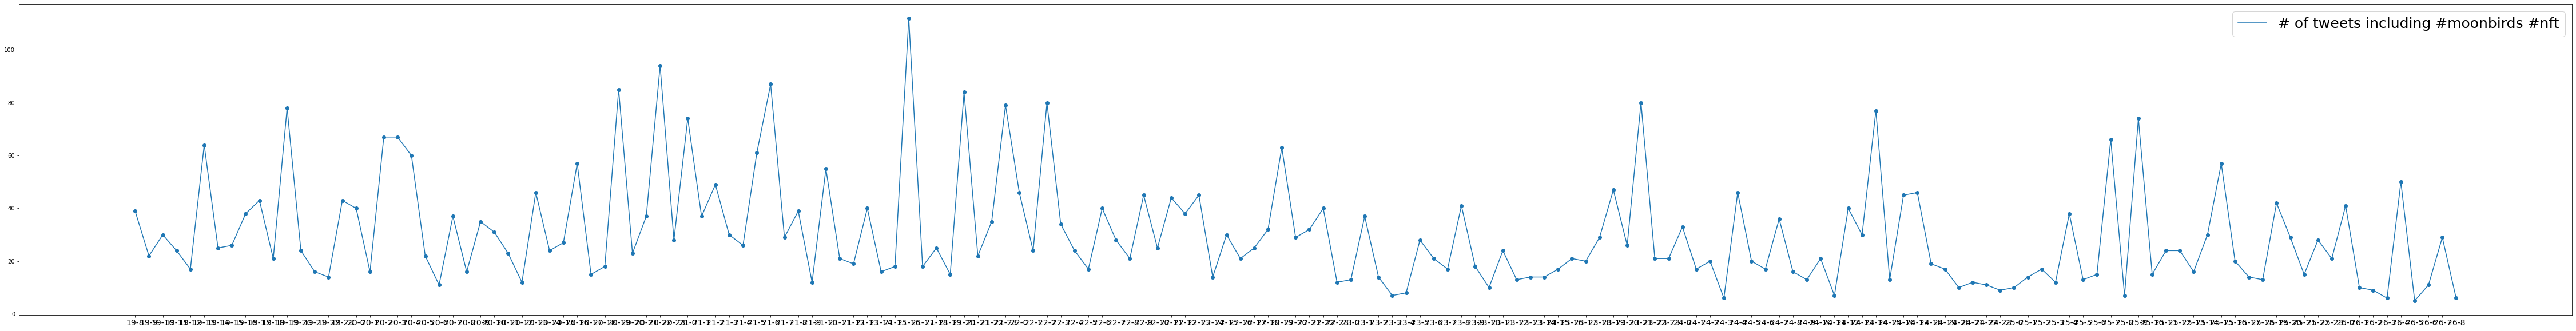

In [17]:
column = 'count'
unit = 'hour'
timeline_vis(data, unit=unit, column=column, crawl_query='moonbirds')

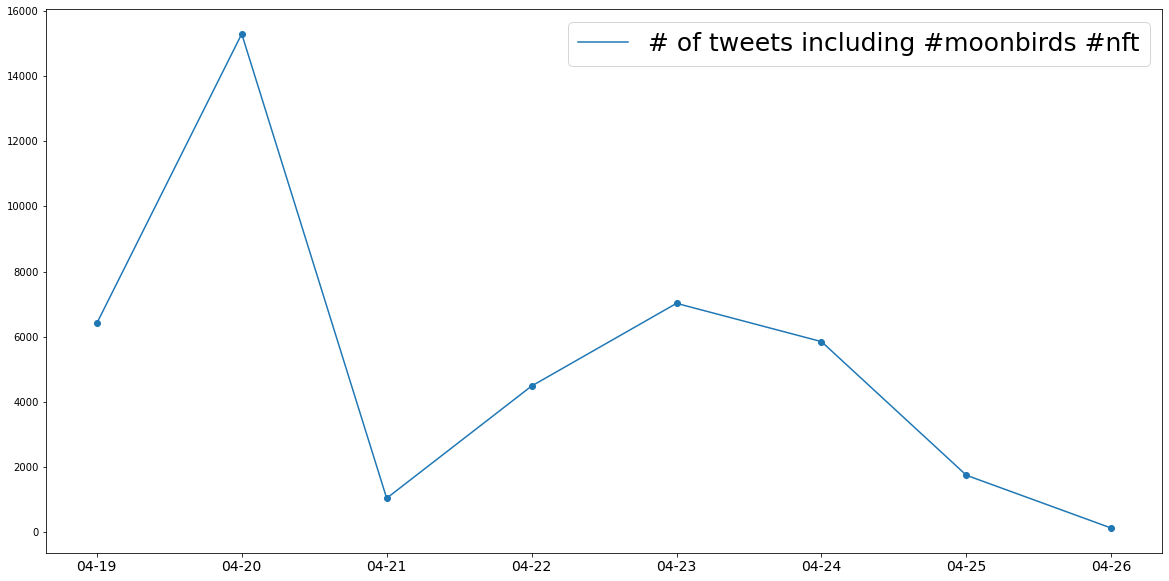

In [18]:
column = 'retweet'
unit = 'day'
timeline_vis(data, unit=unit, column=column, crawl_query='moonbirds')

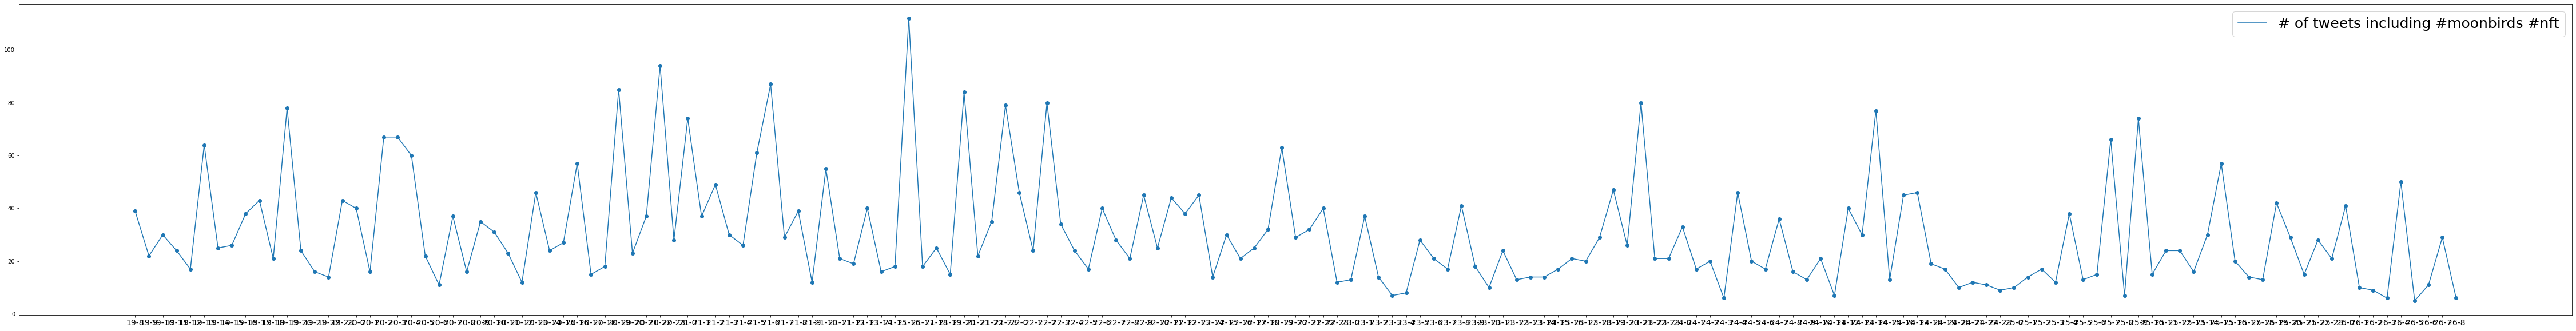

In [19]:
column = 'count'
unit = 'hour'
timeline_vis(data, unit=unit, column=column, crawl_query='moonbirds')

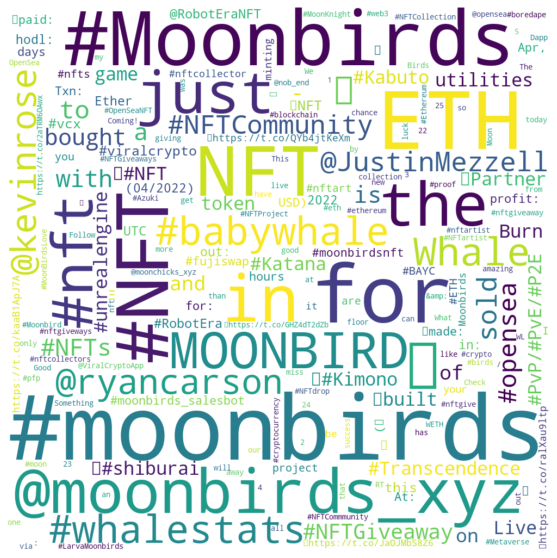

In [23]:
text_tokens = word_viz(data, query='text')

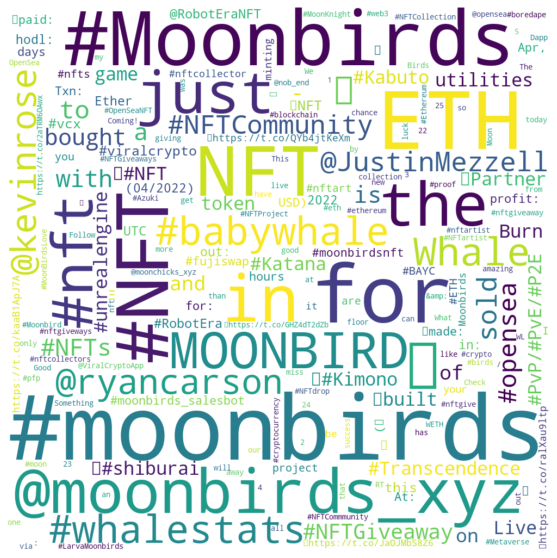

In [24]:
hashtag_tokens = word_viz(data, query='text')